<a href="https://colab.research.google.com/github/chaerui7967/stock_predict_news_and_youtube/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_Arima_prophet_%EB%B9%84%EA%B5%90_%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA

## 라이브러리 설치

In [1]:
!pip install finance-datareader
!pip install pykrx

## colab 이용 시 한글 폰트 설정

In [2]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 버전과 위치정보
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [3]:
# 설치된 폰트 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔고딕 없음

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/liberation/

In [4]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [5]:
# 설치확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [6]:
# 나눔 폰트 설치경로
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/font

In [7]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴
import matplotlib.pyplot as plt
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

Python 3.7.11
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [35]:
fm._rebuild()

In [36]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system...')

In [37]:
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
# 커널 다시시작

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['NanumGothic']


## 데이터 로드

In [11]:
def money_sur(stock_name, start, end):

  # 라이브러리를 찾음... 한방에 나옴...
    start_date = start
    end_date = end
    sample_code = stock_name

    dataset = fdr.DataReader(sample_code, start = start_date, end = end_date )
    dataset = dataset.reset_index()
    df = stock.get_market_fundamental_by_date(fromdate=start_date, todate=end_date, ticker=sample_code)
    df = df.reset_index()
    df.columns = ['Date','BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']
    data = pd.merge(dataset, df, on='Date')

    return data

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
samsung_df = money_sur('005930', start = '20180101', end = end_date)

samsung_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,1156530,16.15,2.21,157967,1.12,28500
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,1156530,16.34,2.23,157967,1.10,28500
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,1156530,16.17,2.21,157967,1.12,28500
3,2018-01-05,51300,52120,51200,52120,189623,0.020360,1156530,16.50,2.25,157967,1.09,28500
4,2018-01-08,52400,52520,51500,52020,167673,-0.001919,1156530,16.47,2.25,157967,1.10,28500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,75300,75600,74800,75300,10103212,0.000000,39406,19.60,1.91,3841,3.98,2994
912,2021-09-13,75200,76300,75100,76300,11397775,0.013280,39406,19.86,1.94,3841,3.92,2994
913,2021-09-14,77100,77700,76600,76600,18167057,0.003932,39406,19.94,1.94,3841,3.91,2994
914,2021-09-15,77400,77400,76400,77000,12829128,0.005222,39406,20.05,1.95,3841,3.89,2994


## ARIMA 모수 설정

In [13]:
df1 = samsung_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,51020
1,2018-01-03,51620
2,2018-01-04,51080
3,2018-01-05,52120
4,2018-01-08,52020
...,...,...
911,2021-09-10,75300
912,2021-09-13,76300
913,2021-09-14,76600
914,2021-09-15,77000


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


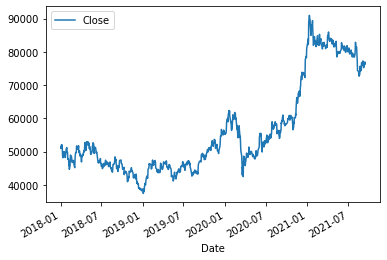

In [14]:
df1.plot('Date','Close')

In [15]:
df1.columns = ['Date', 'Price']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


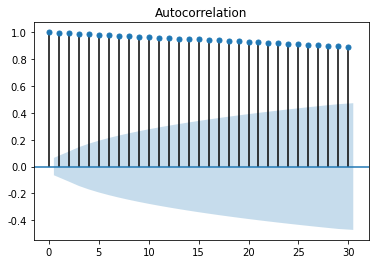

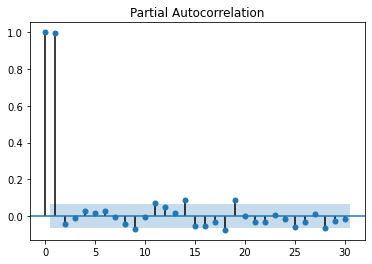

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df1.Price)
plot_pacf(df1.Price)
plt.show()

ACF를 보면 완만하지만 꾸준히 줄어드는 것으로 보인다. 또한 PACF는 1의 Time lag에서 약 0.99를 보이고 이후에 급격히 감소한다.

In [17]:
# 시계열 정상성 검정 Augmented Dickey-Fuller Test
# 비정상성 확인

from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Price'])

print(f'ADF statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF statistic: -0.5556464763024015
p-value: 0.8806925134920545


1차 차분 및 로그변환

In [18]:
x = df1['Price'].values
x = np.log(x)

diff = x[1:] - x[:-1] # 차분

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


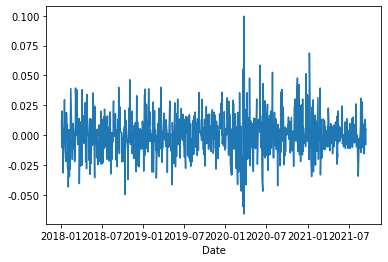

In [19]:
sns.lineplot(df1.iloc[1:, 0], diff)

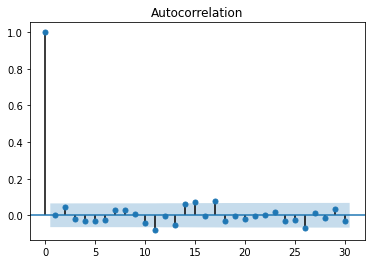

In [20]:
fig = plot_acf(diff)

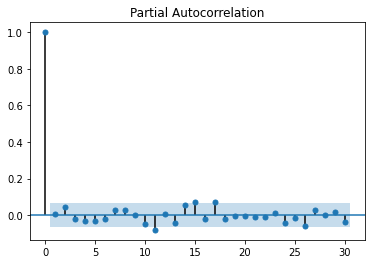

In [21]:
fig = plot_pacf(diff)

In [22]:
result_r = adfuller(diff)

print(f'ADF statistic: {result_r[0]}')
print(f'p-value: {result_r[1]}')  # 1차 차분만으로도 유효한 결과가 나옴

ADF statistic: -30.085513655768903
p-value: 0.0


## Arima model

In [23]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# 1,0,1 // 1,1,1 // 1,2,1 // 1,2,2 // 2,2,2 // .... 여러가지 차수를 지정해봤을 때 2,1,2가 최적임
# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(df1.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  915
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7562.461
Method:                       css-mle   S.D. of innovations            937.695
Date:                Thu, 16 Sep 2021   AIC                          15136.922
Time:                        05:46:28   BIC                          15165.835
Sample:                             1   HQIC                         15147.958
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7180     31.188      0.440      0.660     -47.408      74.844
ar.L1.D.y     -1.5981      0.011   -145.942      0.000      -1.620      -1.577
ar.L2.D.y     -0.9804      0.008   -116.146      0.0

In [24]:
# const 가 유의하지 않으므로 trend를 nc로해서 다시 모델 적합
model = ARIMA(df1.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  915
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7562.758
Method:                       css-mle   S.D. of innovations            937.924
Date:                Thu, 16 Sep 2021   AIC                          15135.516
Time:                        05:46:29   BIC                          15159.610
Sample:                             1   HQIC                         15144.713
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -1.5980      0.011   -147.520      0.000      -1.619      -1.577
ar.L2.D.y     -0.9804      0.008   -116.972      0.000      -0.997      -0.964
ma.L1.D.y      1.5997      0.007    215.027      0.0

In [25]:
# 학습, 테스트 데이터 분리
train = df1[:-10]
test = df1[-10:]

In [26]:
model = ARIMA(train.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  905
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7481.576
Method:                       css-mle   S.D. of innovations            939.466
Date:                Thu, 16 Sep 2021   AIC                          14973.153
Time:                        05:46:30   BIC                          14997.193
Sample:                             1   HQIC                         14982.334
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -1.5979      0.011   -150.287      0.000      -1.619      -1.577
ar.L2.D.y     -0.9791      0.009   -114.157      0.000      -0.996      -0.962
ma.L1.D.y      1.6001      0.006    253.828      0.0

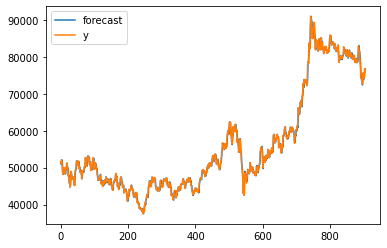

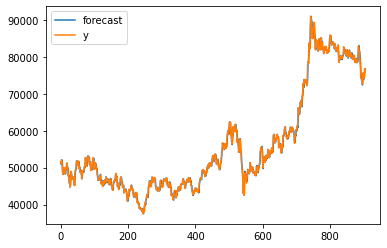

In [27]:
model_fit.plot_predict()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_

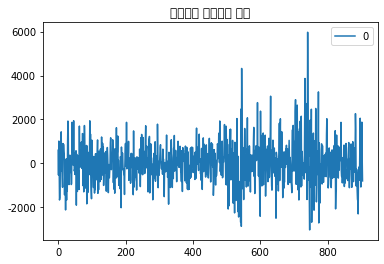

In [28]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [29]:
fore = model_fit.forecast(steps=10) # 10일 예측
print(fore)

(array([76118.13447892, 75916.90870358, 76122.79240151, 75990.81647751,
       76000.13299935, 76114.45732424, 75922.65430604, 76117.21149139,
       75994.10910168, 76000.33564103]), array([ 939.46569342, 1330.02983147, 1638.99357786, 1884.34840208,
       2114.14555717, 2313.68662106, 2497.90948864, 2675.05132547,
       2832.28828008, 2989.8499375 ]), array([[74276.81555512, 77959.45340273],
       [73310.09813554, 78523.71927162],
       [72910.42401801, 79335.16078501],
       [72297.56147511, 79684.07147992],
       [71856.48384923, 80143.78214947],
       [71579.71487544, 80649.19977304],
       [71026.84167166, 80818.46694043],
       [70874.20723667, 81360.21574612],
       [70442.9260789 , 81545.29212446],
       [70140.33744434, 81860.33383771]]))


## Arima 결과

In [30]:
# 마지막 10일의 예측 데이터
pred_arima_y = fore[0].tolist()

# 실제 10일의 데이터 
test_y = test.Price.values

# 신뢰구간
# 마지막 10일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in fore[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

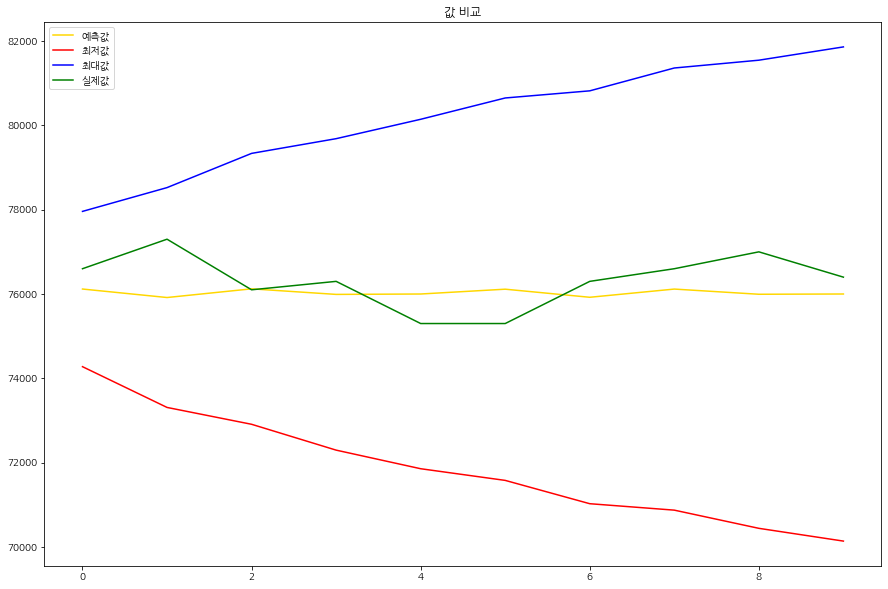

In [38]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))
print(rmse_arima)

702.9793328756607


10일 예측이 제일 rmse가 적음
- 5일 약 1100
- 20일 약 2200

# Prophet

## 데이터 로드

In [39]:
def money_sur(stock_name, start, end):

  # 라이브러리를 찾음... 한방에 나옴...
    start_date = start
    end_date = end
    sample_code = stock_name

    dataset = fdr.DataReader(sample_code, start = start_date, end = end_date )
    dataset = dataset.reset_index()
    df = stock.get_market_fundamental_by_date(fromdate=start_date, todate=end_date, ticker=sample_code)
    df = df.reset_index()
    df.columns = ['Date','BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']
    data = pd.merge(dataset, df, on='Date')

    return data

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
samsung_df = money_sur('005930', start = '20180101', end = end_date)

samsung_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,1156530,16.15,2.21,157967,1.12,28500
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,1156530,16.34,2.23,157967,1.10,28500
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,1156530,16.17,2.21,157967,1.12,28500
3,2018-01-05,51300,52120,51200,52120,189623,0.020360,1156530,16.50,2.25,157967,1.09,28500
4,2018-01-08,52400,52520,51500,52020,167673,-0.001919,1156530,16.47,2.25,157967,1.10,28500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,75300,75600,74800,75300,10103212,0.000000,39406,19.60,1.91,3841,3.98,2994
912,2021-09-13,75200,76300,75100,76300,11397775,0.013280,39406,19.86,1.94,3841,3.92,2994
913,2021-09-14,77100,77700,76600,76600,18167057,0.003932,39406,19.94,1.94,3841,3.91,2994
914,2021-09-15,77400,77400,76400,77000,12829128,0.005222,39406,20.05,1.95,3841,3.89,2994


## Prophet 모델 실습

- Prophet은 Additive 모델이라는 모델링 방법에 기반한 시계열 예측모델로, 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점이 맞추어져 있다.
- fbprophet 라이브러리를 사용하기 위해서는 데이터 프레임의 피쳐를 'ds'와 'y'로 변경해야 한다. 
  - sesonality_mode: 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미하는 파라미터
    - Additive는 데이터의 진폭이 일정함을 의미하고, Multiplicative는 데이터의 진폭이 점점 증가하거나 감소하는 것을 뜻함
  - changepoint_prior_scale: 트렌드가 변경되는 문맥을 반영하는 파라미터. 수치가 높을수록 모델은 과적합에 가까워진다.

In [41]:
df1 = samsung_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,51020
1,2018-01-03,51620
2,2018-01-04,51080
3,2018-01-05,52120
4,2018-01-08,52020
...,...,...
911,2021-09-10,75300
912,2021-09-13,76300
913,2021-09-14,76600
914,2021-09-15,77000


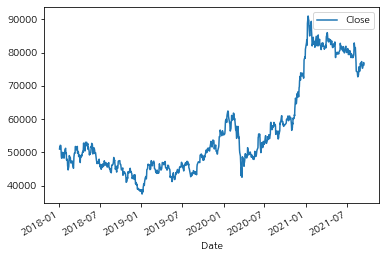

In [42]:
df1.plot('Date','Close')

In [43]:
df1.columns = ['ds', 'y']

In [44]:
# train, test
train = df1[:-10]
test = df1[-10:]

In [45]:
from fbprophet import Prophet

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.7)

prophet.fit(train)

In [46]:
# 10일단위로 예측값을 가져옴
future_data = prophet.make_future_dataframe(periods = 10, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
906,2021-09-03,75866.790700,73982.762591,77597.595576
907,2021-09-04,64630.611540,62701.083388,66550.216383
908,2021-09-05,64827.018102,62857.762471,66801.406027
909,2021-09-06,76492.905832,74651.990132,78357.356415
910,2021-09-07,76971.062681,75099.204507,78823.990253
911,2021-09-08,77088.719956,75267.726953,78906.842419
912,2021-09-09,77269.344688,75425.824712,79264.775144
913,2021-09-10,77417.116125,75394.499899,79360.152627
914,2021-09-11,66180.794340,64406.880816,68186.166202
915,2021-09-12,66409.098235,64618.908717,68373.653450


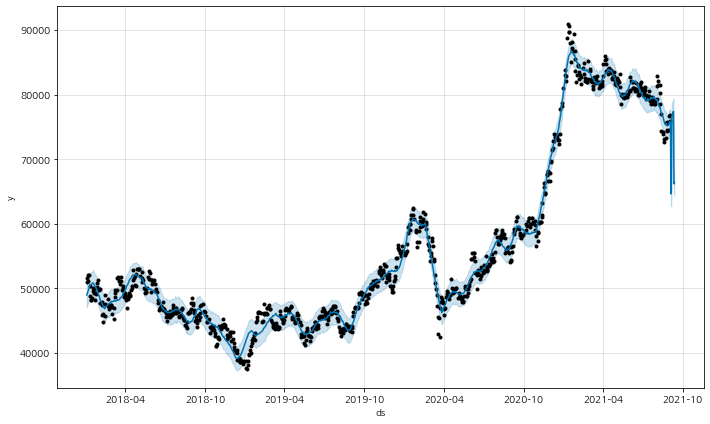

In [47]:
fig1 = prophet.plot(forecast_data)

그래프는 fbprophet에서 제공하는 트렌드 정보 시각화 그래프이다. 앞서 seasonality_mode 파라미터를 설정해놓은 경우에만 이 시각화가 가능

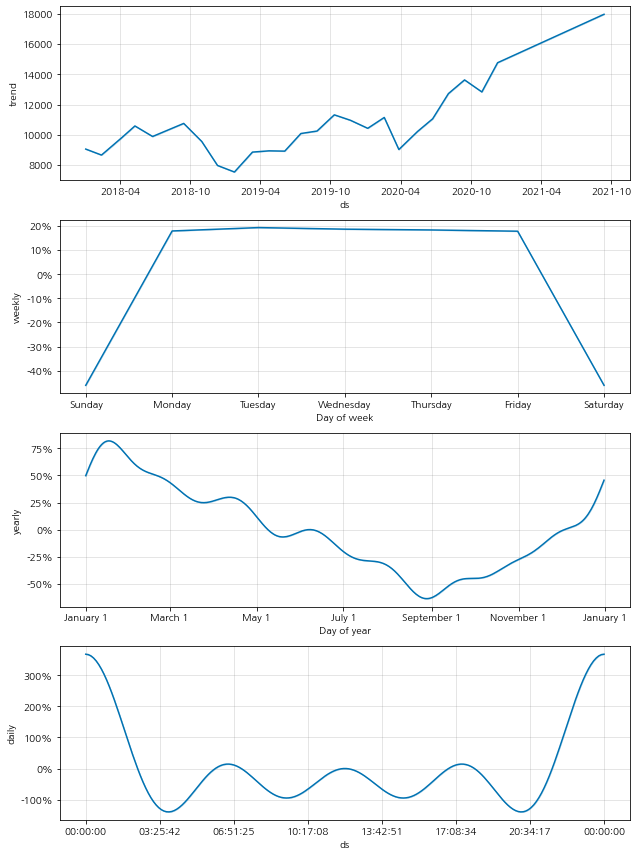

In [48]:
fig2 = prophet.plot_components(forecast_data)

## 결과

In [49]:
# test
test.y.values

array([76600, 77300, 76100, 76300, 75300, 75300, 76300, 76600, 77000,
       76300])

Text(0.5, 1.0, '값 비교')

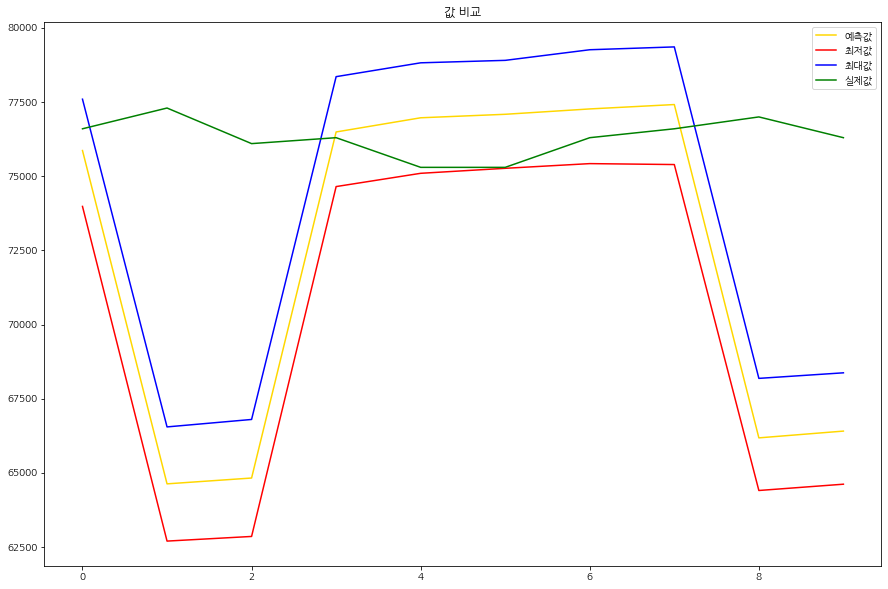

In [50]:
plt.figure(figsize=(15, 10))

# 마지막 10일의 예측 데이터
pred_fbprophet_y = forecast_data.yhat.values[-10:]

# 실제 10일의 데이터 
test_y = test.y.values

# 마지막 10일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-10:]
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-10:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [51]:
pred_fbprophet_y

array([75866.79070016, 64630.61154013, 64827.01810194, 76492.90583211,
       76971.06268085, 77088.71995585, 77269.34468797, 77417.11612487,
       66180.79433953, 66409.09823536])

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

prophet_arima = sqrt(mean_squared_error(pred_fbprophet_y, test_y))
print(prophet_arima)

7145.9971987759745


- 10일 _changepoint_prior_scale 파라미터 조정
  - 0.5 : 7068
  - 0.6 : 6676  <-
  - 0.7 : 7173  --- 이상 넘어가면 과적합

## 모델 비교

In [53]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   '실제값':test_y})
df

,ARIMA 예측값,FBprophet 예측값,실제값
0,76118.134479,75866.790700,76600
1,75916.908704,64630.611540,77300
2,76122.792402,64827.018102,76100
3,75990.816478,76492.905832,76300
4,76000.132999,76971.062681,75300
5,76114.457324,77088.719956,75300
6,75922.654306,77269.344688,76300
7,76117.211491,77417.116125,76600
8,75994.109102,66180.794340,77000
9,76000.335641,66409.098235,76300


Text(0.5, 1.0, '값 비교')

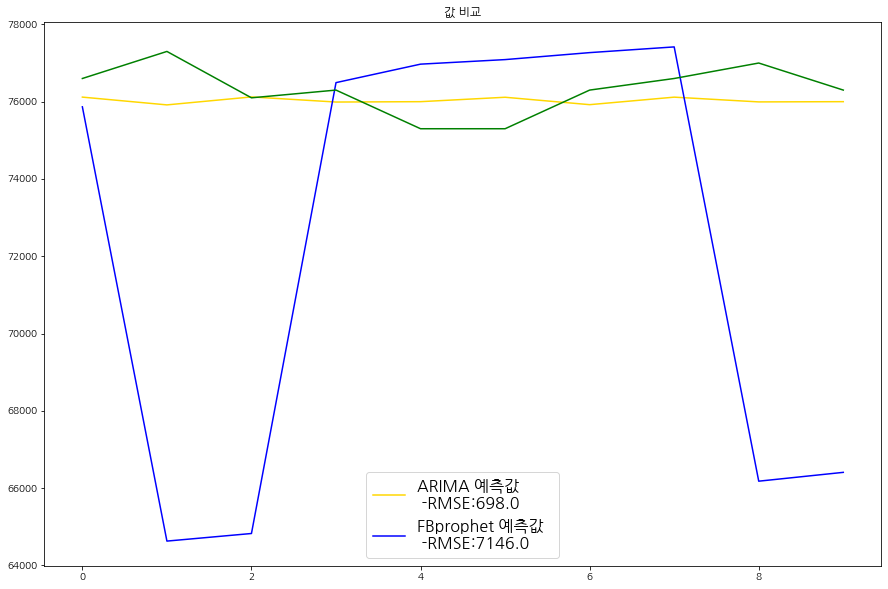

In [54]:
plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'blue')


# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA 예측값 \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet 예측값  \n -RMSE:' + str(round(rmse_fbprophet,0))])
plt.title("값 비교")